In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import os
import csv

import matplotlib.pyplot as plt

In [2]:
PATH = "../../results_cellmixing_numbers/"

In [3]:
CSV = sorted(glob.glob(PATH+'*NUMBERS.csv'))
CSV

['../../results_cellmixing_numbers/436A_NUMBERS.csv',
 '../../results_cellmixing_numbers/436D_NUMBERS.csv',
 '../../results_cellmixing_numbers/436E_NUMBERS.csv',
 '../../results_cellmixing_numbers/436F_NUMBERS.csv',
 '../../results_cellmixing_numbers/436G_NUMBERS.csv',
 '../../results_cellmixing_numbers/436H_NUMBERS.csv',
 '../../results_cellmixing_numbers/438A_NUMBERS.csv',
 '../../results_cellmixing_numbers/438D_NUMBERS.csv',
 '../../results_cellmixing_numbers/438E_NUMBERS.csv',
 '../../results_cellmixing_numbers/438F_NUMBERS.csv',
 '../../results_cellmixing_numbers/438G_NUMBERS.csv',
 '../../results_cellmixing_numbers/438H_NUMBERS.csv',
 '../../results_cellmixing_numbers/S436E_NUMBERS.csv']

In [4]:
#Check for D,E,F files
CSV[1:4]

['../../results_cellmixing_numbers/436D_NUMBERS.csv',
 '../../results_cellmixing_numbers/436E_NUMBERS.csv',
 '../../results_cellmixing_numbers/436F_NUMBERS.csv']

In [5]:
#Read dataframes for all files and take a look
df_436 = []
for file in CSV[1:4]:
    df_436.append(pd.read_csv(file, index_col=0))
df_436[0]

,436D
Human_BC1,6671
Human_BC2,47677
Mouse_BC1,144830
Mouse_BC2,18965
Human_TotalReads,54348
Mouse_TotalReads,163795
TotalReads,218143


In [6]:
#Enter in the number for eGFP reads, order is experiment D, E, F
eGFP_bc2 = np.array([300, 811, 546])
eGFP_bc1 = np.array([21, 67, 41])

In [7]:
def calcFrac(data):
    h_bc2 = data.loc["Human_BC2"] / data.loc["Human_TotalReads"]
    m_bc1 = data.loc["Mouse_BC1"] / data.loc["Mouse_TotalReads"]
    
    return h_bc2, m_bc1

In [8]:
#construct a new dataframe for plotting scatterplots of fraction of correct reads
hm_df = pd.DataFrame(columns = ["Human BC2", "Mouse BC1", "Mapped Read"], index=range(9))
hm_df.index.name = "Fraction of Reads"

In [9]:
#construct the dataframe and visualize it
for idx,df in enumerate(df_436):
    h_bc2, m_bc1 = calcFrac(df)
    hm_df.loc[idx, "Human BC2"] = h_bc2[0]
    hm_df.loc[idx, "Mouse BC1"] = 1-h_bc2[0]
    hm_df.loc[idx, "Mapped Read"] = "Human"
    
    hm_df.loc[idx+3, "Mouse BC1"] = m_bc1[0]
    hm_df.loc[idx+3, "Human BC2"] = 1-m_bc1[0]
    hm_df.loc[idx+3, "Mapped Read"] = "Mouse"
    
    hm_df.loc[idx+6, "Human BC2"] = eGFP_bc2[idx] / (eGFP_bc2[idx] + eGFP_bc1[idx])
    hm_df.loc[idx+6, "Mouse BC1"] = eGFP_bc1[idx] / (eGFP_bc2[idx] + eGFP_bc1[idx])
    hm_df.loc[idx+6, "Mapped Read"] = "eGFP"
hm_df

,Human BC2,Mouse BC1,Mapped Read
Fraction of Reads,,,
0,0.877254,0.122746,Human
1,0.877299,0.122701,Human
2,0.865397,0.134603,Human
3,0.115785,0.884215,Mouse
4,0.117974,0.882026,Mouse
5,0.103839,0.896161,Mouse
6,0.934579,0.065421,eGFP
7,0.92369,0.07631,eGFP
8,0.930153,0.069847,eGFP


In [10]:
#Save df
hm_df.to_csv("436_BCFraction.csv")

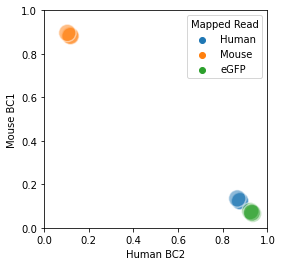

In [11]:
#Plot Figure
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=hm_df, x="Human BC2", y="Mouse BC1", hue="Mapped Read", alpha=0.5, s=300)
ax.set(ylim=(0,1))
ax.set(xlim=(0,1))
plt.savefig("436_BCFraction.pdf")

#### Additional barplots if needed

In [12]:
#Create seperate dataframe for barplot
human_frac = hm_df[hm_df.loc[:,"Mapped Read"] == "Human"]
human_frac = human_frac.loc[:,"Human BC2"]

mouse_frac = hm_df[hm_df.loc[:,"Mapped Read"] == "Mouse"]
mouse_frac = mouse_frac.loc[:,"Mouse BC1"]

eGFP_frac = hm_df[hm_df.loc[:,"Mapped Read"] == "eGFP"]
eGFP_frac = eGFP_frac.loc[:,"Human BC2"]

data=[]
data = pd.concat([human_frac, mouse_frac, eGFP_frac], axis=1, ignore_index = True)
data.columns = ["Human", "Mouse", "eGFP"]
data

,Human,Mouse,eGFP
Fraction of Reads,,,
0,0.877254,NaN,NaN
1,0.877299,NaN,NaN
2,0.865397,NaN,NaN
3,NaN,0.884215,NaN
4,NaN,0.882026,NaN
5,NaN,0.896161,NaN
6,NaN,NaN,0.934579
7,NaN,NaN,0.92369
8,NaN,NaN,0.930153


[(0.0, 1.0)]

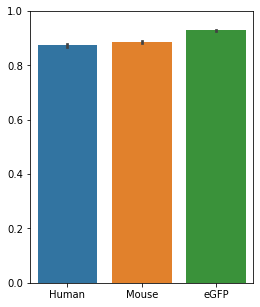

In [13]:
fig_dims = (4, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=data, ax=ax, ci=68)
ax.set(ylim=(0,1))
#h.patches[0].set_width(0.2)
#plt.savefig("436_BCfrac.png", dpi=300)
#plt.savefig("436_BCfrac.pdf")